In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re #regular expression
import string
import nltk
from nltk.corpus import stopwords

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer

from nltk.util import ngrams    #for ngram implementation

import pickle

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import f1_score


In [2]:
#read pickle file
train_data=pd.read_pickle("train_second_data.pkl")
train_data

,ID,Review,Rating,subjectivity,polarity,Review_Type
0,0,exceptional service nice daughter priced king ...,5,0.760000,0.427222,Positive
1,1,beautiful relaxing jw marriott desert ridge ou...,5,0.837870,0.564907,Positive
2,2,location location min subway take blommingdale...,5,0.513333,0.273333,Positive
3,3,pleased nice safe flower market vast array res...,3,0.613636,0.196970,Positive
4,4,excellent service excellent location couple mi...,4,0.766667,0.654167,Positive
...,...,...,...,...,...,...
14338,14338,madrid perfect location tiny quiet street cent...,5,0.566667,0.333333,Positive
14339,14339,excellent florence chosen tripadviser hidden g...,5,0.710417,0.403125,Positive
14340,14340,place relax vacation book trip paradisus husba...,4,0.479297,0.209258,Positive
14341,14341,week seattle loved minute pacific plaza buy im...,3,0.600000,0.433333,Positive


In [3]:
#Remove review_type neutral
train_data=train_data[train_data.Review_Type !="Neutral"]
train_data["Review_Type"].value_counts()

Positive    12690
Negative     1600
Name: Review_Type, dtype: int64

In [4]:
#replace target variable which is categorical  into numerical form
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
train_data['Review_Type']= label_encoder.fit_transform(train_data['Review_Type']) 
  
train_data['Review_Type'].unique()

C:\Users\sathi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


array([1, 0])

In [5]:
train_data["Review_Type"].value_counts()

1    12690
0     1600
Name: Review_Type, dtype: int64

# MODEL BUILDING USING Logistic Regression

# Bag of Words Approach

In [10]:
#pickle stopwords

stop= pd.read_pickle('stp_wrds.pkl')
stop

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [11]:
#create bag of words using bigram
bow_counts=CountVectorizer(tokenizer=word_tokenize,stop_words=stop,ngram_range=(2,2))
bow_data=bow_counts.fit_transform(train_data["Review"])

C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'m", "'re", "'s", "'ve", 'ai', 'ca', "n't", 'sha', 'wo'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [12]:
#Training and splitting the data
X_train_bow,X_test_bow,y_train_bow,y_test_bow=train_test_split(bow_data,train_data["Review_Type"],test_size=0.2,random_state=0)

In [13]:
y_test_bow.value_counts()/y_test_bow.shape[0]

1    0.892582
0    0.107418
Name: Review_Type, dtype: float64

In [14]:
#Apply logistic regression for model building
lr_model_all=LogisticRegression()
lr_model_all.fit(X_train_bow,y_train_bow)

LogisticRegression()

In [15]:
#Predicting the model
test_pred_lr_all=lr_model_all.predict(X_test_bow)

In [16]:
#calculate accuracy  usin F1-score
from sklearn.metrics import f1_score 
print("F1 score:", f1_score(y_test_bow,test_pred_lr_all))

F1 score: 0.9468005952380951


In [17]:
bow_counts.get_feature_names()

['aa center',
 'aa food',
 'aa forget',
 'aa partner',
 'aa travel',
 'aaa apple',
 'aaa card',
 'aaa club',
 'aaa diamond',
 'aaa disc',
 'aaa discount',
 'aaa fantastic',
 'aaa fine',
 'aaa kahala',
 'aaa member',
 'aaa mention',
 'aaa office',
 'aaa rate',
 'aaa rated',
 'aaa regular',
 'aaa star',
 'aaa told',
 'aaa travel',
 'aaaa wasnt',
 'aaaaaaaaaaaaaaa ebay',
 'aaaare sexy',
 'aaah orleans',
 'aaahhh heaven',
 'aadvantage card',
 'aahh quiet',
 'aahh westin',
 'aalders disappointed',
 'aand water',
 'aany restaurant',
 'aaron joe',
 'aaron judy',
 'aarp rate',
 'aarrgh open',
 'aavacations booked',
 'ab disco',
 'ab fab',
 'ab skipper',
 'ab ticket',
 'ab viladomat',
 'ab zone',
 'abac missed',
 'aback advice',
 'aback attention',
 'aback check',
 'aback handed',
 'aback receptionist',
 'aback shabby',
 'aback website',
 'abaited returned',
 'abalone restaurant',
 'abandon building',
 'abandon weekend',
 'abandoned animal',
 'abandoned book',
 'abandoned building',
 'abandoned

In [18]:
# top 10 positive bigram 
lr_weights=pd.DataFrame(list(zip(bow_counts.get_feature_names(),lr_model_all.coef_[0])),columns=['words','weights'])
pos_words=lr_weights.sort_values(["weights"], ascending=False)[:10]
pos_words

,words,weights
190648,excellent location,1.211722
107921,clean comfortable,1.123184
228391,friendly staff,1.117777
117029,comfortable bed,1.055660
257734,highly recommend,1.032257
51040,bed comfortable,1.031388
227932,friendly helpful,1.031332
473192,service excellent,1.024022
509156,staff friendly,0.883065
359310,nice touch,0.876997


# Top 100 positive word cloud representation using bigram

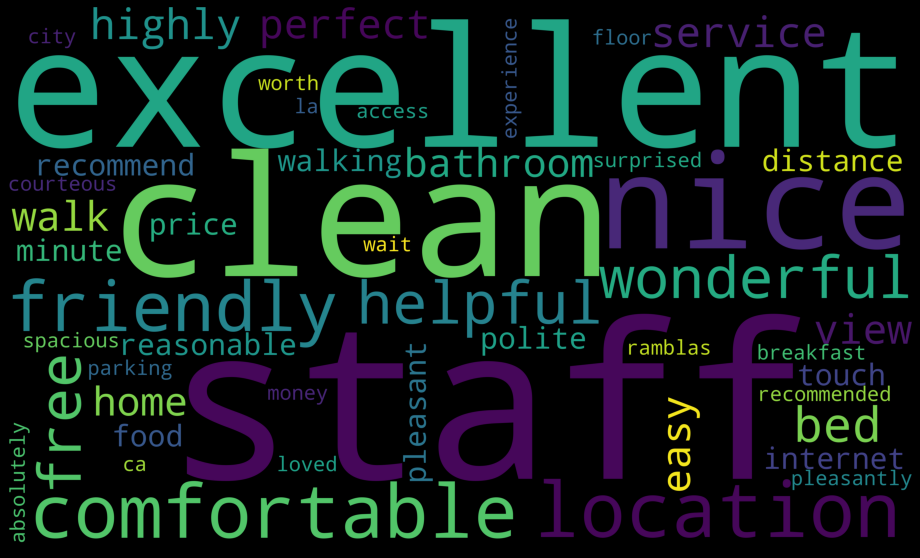

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud=WordCloud(width=5000,height=3000,background_color='black',max_words=100).generate(" ".join(pos_words.words))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [19]:
#top 20 negative bigram
neg_words=lr_weights.sort_values(['weights'], ascending = False)[-50:]
neg_words

,words,weights
396349,place dirty,-0.560477
513050,star quality,-0.560930
465086,save money,-0.567476
34429,avoid place,-0.567674
219931,food horrible,-0.572416
606770,worst place,-0.572485
510382,staff unfriendly,-0.579782
233893,gave floor,-0.583786
51924,bed small,-0.586185
402326,pm check,-0.586972


# Top 100 negative word cloud using bigram

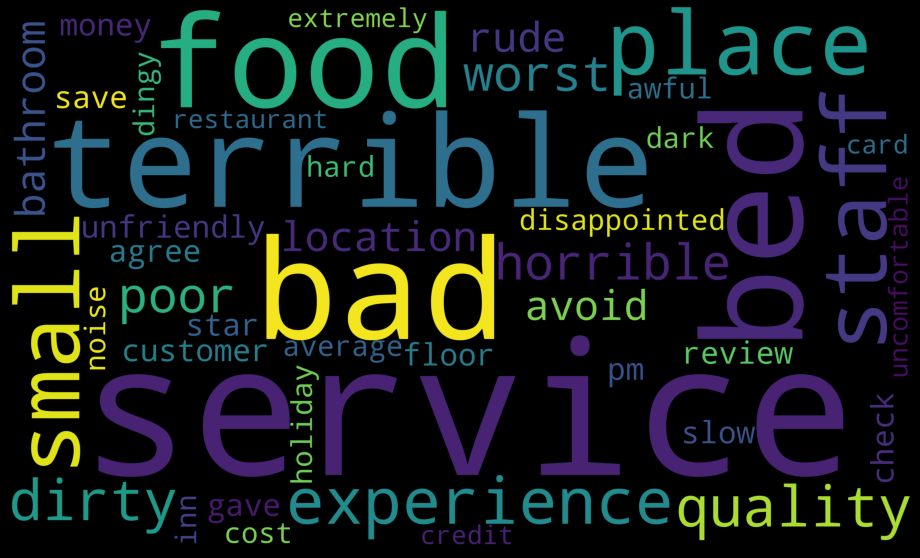

In [20]:

wordcloud=WordCloud(width=5000,height=3000,background_color='black',max_words=100).generate(" ".join(neg_words.words))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Logistic regression-trigram

In [22]:
#create bag of words using trigram
bow_counts=CountVectorizer(tokenizer=word_tokenize,stop_words=stop,ngram_range=(3,3))
bow_data=bow_counts.fit_transform(train_data["Review"])

C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'m", "'re", "'s", "'ve", 'ai', 'ca', "n't", 'sha', 'wo'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [23]:
#Training and splitting the data
X_train_bow,X_test_bow,y_train_bow,y_test_bow=train_test_split(bow_data,train_data["Review_Type"],test_size=0.2,random_state=0)

In [24]:
y_test_bow.value_counts()/y_test_bow.shape[0]

1    0.892582
0    0.107418
Name: Review_Type, dtype: float64

In [25]:
#Apply logistic regression for model building
lr_model_all=LogisticRegression()
lr_model_all.fit(X_train_bow,y_train_bow)

LogisticRegression()

In [26]:
#Predicting the model
test_pred_lr_trigram=lr_model_all.predict(X_test_bow)

In [27]:
#calculate accuracy  usin F1-score
from sklearn.metrics import f1_score 
print("F1 score:", f1_score(y_test_bow,test_pred_lr_trigram))

F1 score: 0.9432427435755223


In [29]:
# top 10 positive trigram 
lr_weights=pd.DataFrame(list(zip(bow_counts.get_feature_names(),lr_model_all.coef_[0])),columns=['words','weights'])
pos_words=lr_weights.sort_values(["weights"], ascending=False)[:50]
pos_words

,words,weights
834822,staff friendly helpful,1.434760
349296,flat screen tv,0.772283
834214,staff extremely helpful,0.764992
367778,free internet access,0.694093
284755,easy walking distance,0.648718
375329,friendly helpful staff,0.644527
510500,location walking distance,0.597240
185678,clean staff friendly,0.567966
835552,staff helpful friendly,0.560707
834212,staff extremely friendly,0.540884


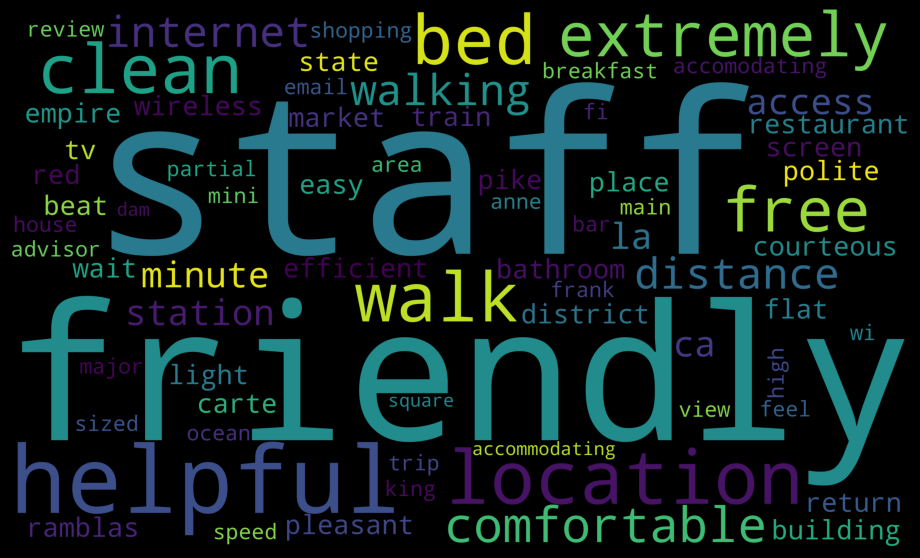

In [30]:
wordcloud=WordCloud(width=5000,height=3000,background_color='black',max_words=100).generate(" ".join(pos_words.words))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [31]:
#top 15 negative trigram
neg_words=lr_weights.sort_values(['weights'], ascending = False)[-50:]
neg_words

,words,weights
638264,person bed recommend,-0.510357
119233,breakfast owner extremely,-0.510357
224093,countryside shower bit,-0.510357
50668,average service internet,-0.510357
385300,gave floor arno,-0.510357
414412,hearty breakfast owner,-0.510357
818803,space internet cost,-0.510357
447234,impossibly steep tiny,-0.510357
186500,cleaned bed uncomfortable,-0.510357
99345,bit small complaint,-0.510357


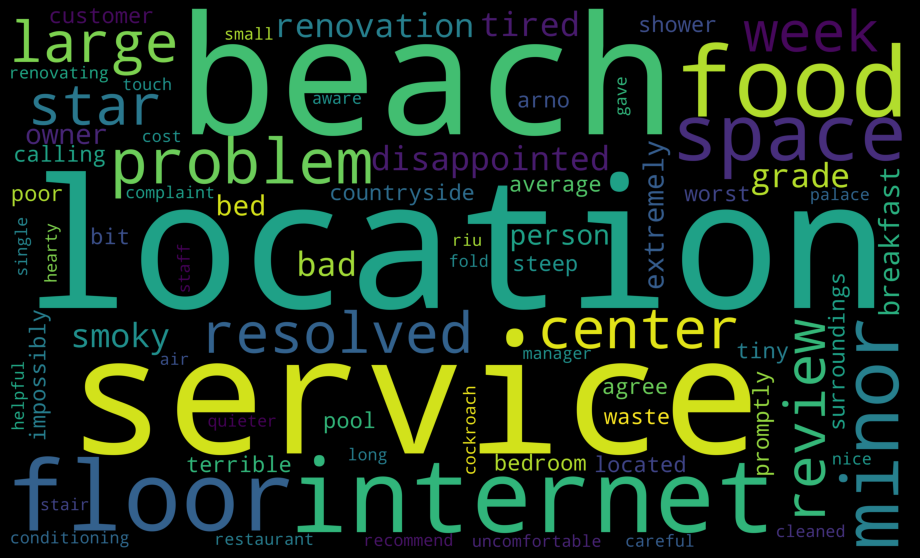

In [32]:
wordcloud=WordCloud(width=5000,height=3000,background_color='black',max_words=100).generate(" ".join(neg_words.words))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# TF-IDF Approach

Term Frequency-Inverse Document Frequency (TF-IDF) method. This evaluates how important a word is to a document within a large collection of documents (i.e. corpus). The importance increases proportionally based on the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

The TF-IDF weight is the product of two terms. The first computes the normalized Term Frequency (TF); i.e. the number of times a word appears in a document divided by the total number of words in that document. The second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears:

In [109]:
### Creating a python object of the class CountVectorizer using bigram
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize, # type of tokenization
                               stop_words=stop, # List of stopwords
                               ngram_range=(2,2)) # number of n-grams

tfidf_data = tfidf_counts.fit_transform(train_data["Review"])

C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'m", "'re", "'s", "'ve", 'ai', 'ca', "n't", 'sha', 'wo'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [110]:
tfidf_data

<14290x611828 sparse matrix of type '<class 'numpy.float64'>'
	with 1070842 stored elements in Compressed Sparse Row format>

In [65]:
#create pickle file for tfidf_data
with open("tfidf_data.pkl", "wb") as picklefile:
       pickle.dump(tfidf_data, picklefile)

In [66]:
with open("tfidf_data.pkl", "rb") as picklefile:
          pickle.load(picklefile)

# Logistic regression-bigram

In [164]:
### Creating a python object for test_data of the class CountVectorizer using bigram
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize, # type of tokenization
                               stop_words=stop, # List of stopwords
                               ngram_range=(2,2)) # number of n-grams

tfidf_bigram_test_data = tfidf_counts.fit_transform(test_data["Review"])

C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'m", "'re", "'s", "'ve", 'ai', 'ca', "n't", 'sha', 'wo'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [16]:
#pickle tfidf_bigram_test_data 

with open("tfidf_bigram_test_data", "wb") as picklefile:
       pickle.dump(tfidf_bigram_test_data, picklefile)


In [17]:
with open("tfidf_bigram_test_data", "rb") as picklefile:
          pickle.load(picklefile)

In [113]:
#training and splitting data
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,train_data["Review_Type"],test_size = 0.2,random_state = 0)

In [165]:
#train the model
lr_model_tf_idf = LogisticRegression()
lr_model_tf_idf.fit(X_train_tfidf,y_train_tfidf)


LogisticRegression()

In [166]:
#predict the model
test_pred_lr_all = lr_model_tf_idf.predict(X_test_tfidf)

In [167]:
# Evaluating the model
print("F1 score: ",f1_score(y_test_bow, test_pred_lr_all))

F1 score:  0.9432427435755223


In [168]:
# top 10 positive bigram 
lr_weights=pd.DataFrame(list(zip(tfidf_counts.get_feature_names(),lr_model_tf_idf.coef_[0])),columns=['words','weights'])
pos_words=lr_weights.sort_values(["weights"], ascending=False)[:10]
pos_words

,words,weights
227932,rer trains,2.587860
257734,sorts characters,2.145223
228391,reservations fellow,1.862854
190648,opportunities ton,1.853682
107921,filthy turned,1.768543
51040,checked expecting,1.662309
117029,fro visit,1.490482
311878,work internet,1.234567
312459,working loved,1.199356
224492,refreshments departed,1.118997


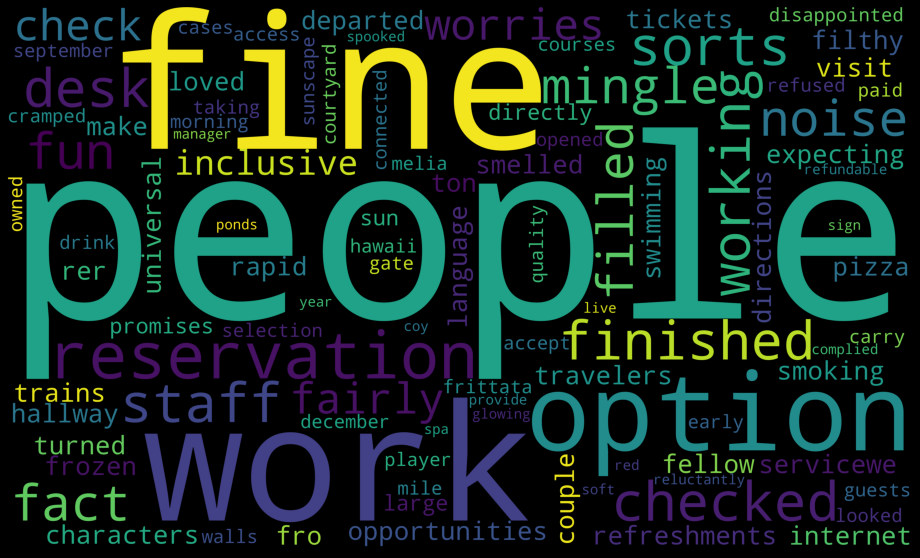

In [118]:
wordcloud=WordCloud(width=5000,height=3000,background_color='black',max_words=100).generate(" ".join(pos_words.words))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [169]:
#top 10 negative bigram
neg_words=lr_weights.sort_values(['weights'], ascending = False)[-10:]
neg_words

,words,weights
45234,cart feeling,-0.918518
34303,boutique smaller,-0.931145
52113,children area,-0.947219
36704,bright airy,-1.001262
260043,spend amsterdam,-1.402518
263203,staff residence,-1.452493
36499,breezes fine,-1.498981
37106,bring torch,-1.667762
140247,improved safe,-1.855088
137066,huge building,-2.042924


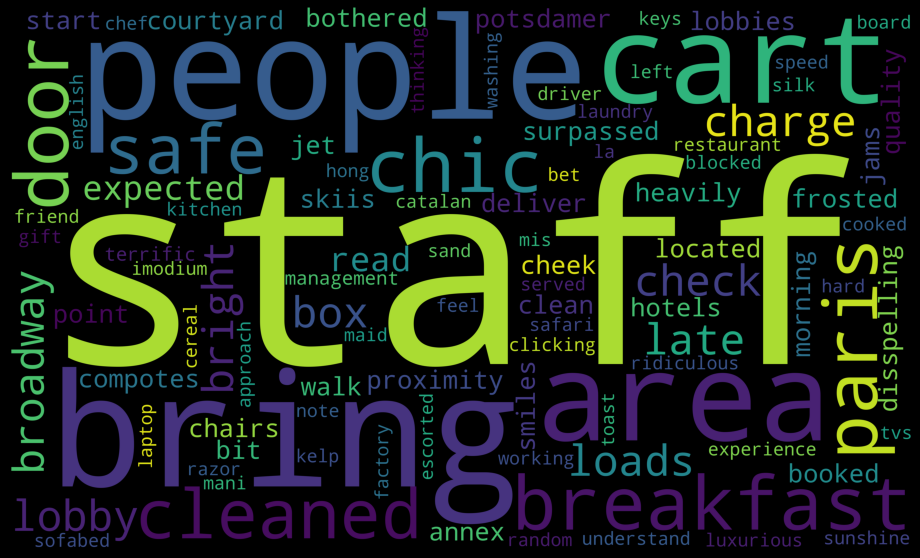

In [122]:
wordcloud=WordCloud(width=5000,height=3000,background_color='black',max_words=100).generate(" ".join(neg_words.words))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Logistic regression-trigram

In [123]:
### Creating a python object of the class CountVectorizer using trigram for train data
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize, # type of tokenization
                               stop_words=stop, # List of stopwords
                               ngram_range=(3,3)) # number of n-grams

tfidf_train_trigram_data = tfidf_counts.fit_transform(train_data["Review"])

C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'m", "'re", "'s", "'ve", 'ai', 'ca', "n't", 'sha', 'wo'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [124]:
### Creating a python object of test data using class CountVectorizer using trigram
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize, # type of tokenization
                               stop_words=stop, # List of stopwords
                               ngram_range=(3,3)) # number of n-grams

tfidf_test_trigram_data = tfidf_counts.fit_transform(test_data["Review"])

In [27]:
#create pickle file for
with open("tfidf_train_trigram_data.pkl", "wb") as picklefile:
       pickle.dump(tfidf_train_trigram_data, picklefile)

with open("tfidf_test_trigram_data.pkl", "wb") as picklefile:
       pickle.dump(tfidf_test_trigram_data, picklefile)        
        

In [28]:
with open("tfidf_train_trigram_data.pkl", "rb") as picklefile:
          pickle.load(picklefile)
        
with open("tfidf_test_trigram_data", "rb") as picklefile:
          pickle.load(picklefile)        

In [125]:
#training and splitting data
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,train_data["Review_Type"],test_size = 0.2,random_state = 0)

In [126]:
#train the model
lr_model_tf_idf_tgram = LogisticRegression()
lr_model_tf_idf_tgram.fit(X_train_tfidf,y_train_tfidf)

LogisticRegression()

In [127]:
#predict the model
test_pred_lr_tgram = lr_model_tf_idf_tgram.predict(X_test_tfidf)

In [128]:
# Evaluating the model
print("F1 score: ",f1_score(y_test_bow, test_pred_lr_tgram))

F1 score:  0.9432427435755223


In [130]:
# top 10 positive trigram 
lr_weights=pd.DataFrame(list(zip(tfidf_counts.get_feature_names(),lr_model_tf_idf_tgram.coef_[0])),columns=['words','weights'])
pos_words=lr_weights.sort_values(["weights"], ascending=False)[:100]
pos_words

,words,weights
227932,low profile light,2.587860
343966,serviced turned chocolates,2.163249
257734,nicest place older,2.145223
228391,lug crap elevators,1.862854
190648,house keeper rubbish,1.853682
...,...,...
107804,depository convention center,0.482537
108354,desk area corner,0.478090
191174,hph payment refundable,0.477995
108873,desk lady listening,0.477556


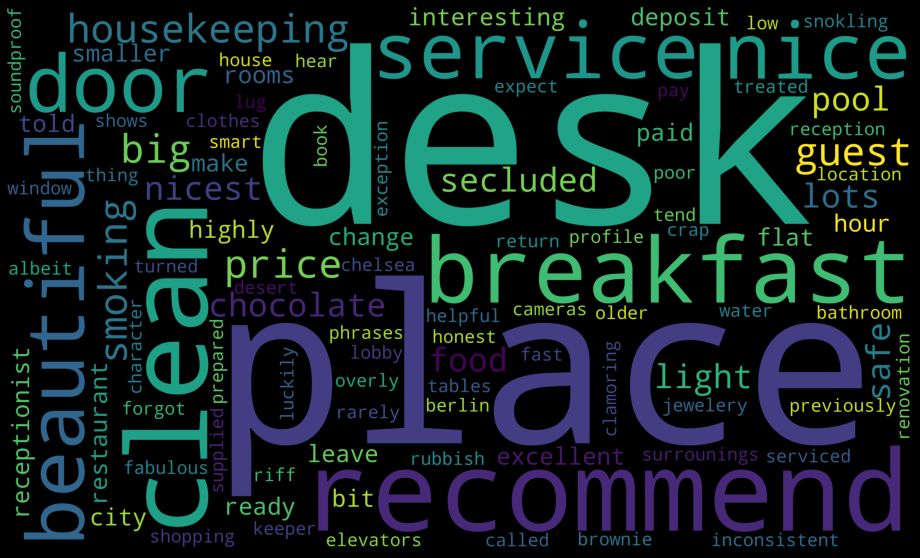

In [131]:
wordcloud=WordCloud(width=5000,height=3000,background_color='black',max_words=100).generate(" ".join(pos_words.words))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [132]:
#top 10 negative trigram
neg_words=lr_weights.sort_values(['weights'], ascending = False)[-100:]
neg_words

,words,weights
157992,foot centrally located,-0.439105
263308,ocean restaurants overlooking,-0.441089
76229,chose feedback friends,-0.443606
51501,breakfast location french,-0.443968
195649,inaccurate recent bookings,-0.444865
...,...,...
263203,ocean grassy walk,-1.452493
36499,becco favourite staff,-1.498981
37106,bed hard sleep,-1.667762
140247,explained credit card,-1.855088


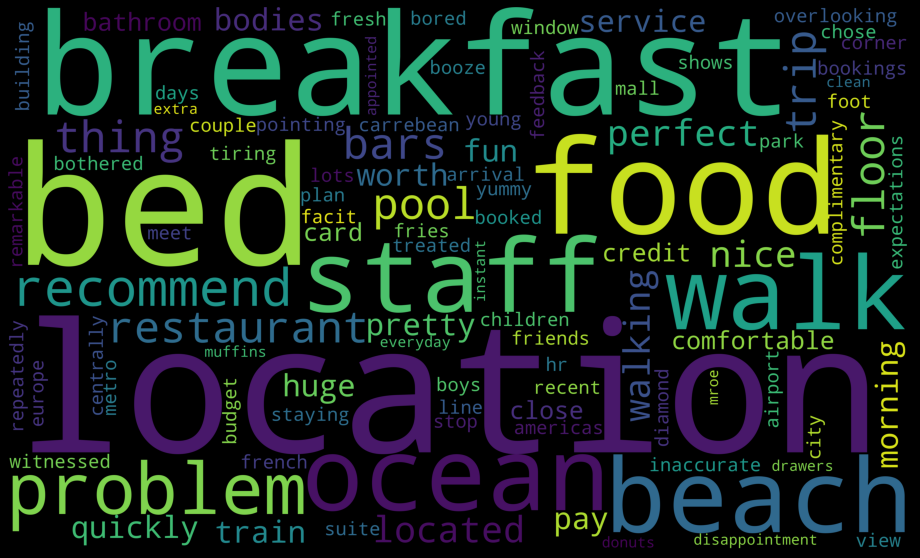

In [133]:
wordcloud=WordCloud(width=5000,height=3000,background_color='black',max_words=100).generate(" ".join(neg_words.words))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# WORD EMBEDDING METHOD

In [20]:
#read pickle file
train_data=pd.read_pickle("train_second_data.pkl")
train_data

,ID,Review,Rating,subjectivity,polarity,Review_Type
0,0,exceptional service nice daughter priced king ...,5,0.760000,0.427222,Positive
1,1,beautiful relaxing jw marriott desert ridge ou...,5,0.837870,0.564907,Positive
2,2,location location min subway take blommingdale...,5,0.513333,0.273333,Positive
3,3,pleased nice safe flower market vast array res...,3,0.613636,0.196970,Positive
4,4,excellent service excellent location couple mi...,4,0.766667,0.654167,Positive
...,...,...,...,...,...,...
14338,14338,madrid perfect location tiny quiet street cent...,5,0.566667,0.333333,Positive
14339,14339,excellent florence chosen tripadviser hidden g...,5,0.710417,0.403125,Positive
14340,14340,place relax vacation book trip paradisus husba...,4,0.479297,0.209258,Positive
14341,14341,week seattle loved minute pacific plaza buy im...,3,0.600000,0.433333,Positive


In [21]:
# create new training and test set for tagged documents purpose
Doc2vec_data = train_data[["Review", "Review_Type"]]

In [22]:
train, test = train_test_split(Doc2vec_data, test_size = 0.2, random_state=42)

In [23]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
nltk.download('punkt')
from sklearn import utils

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sathi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
def tokenize_text(sentence):
    tokens = []

    for sent in nltk.sent_tokenize(sentence):
        for word in nltk.word_tokenize(sent):


            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens



In [25]:
# tagged the documents with unique ID
train_tagged = train.apply(lambda x : TaggedDocument(words = tokenize_text(x["Review"]),tags=[x.Review_Type]), axis=1)
train_tagged


5196     ([nicest, year, travel, traveled, extensively,...
2698     ([closet, room, arrival, greeted, champagne, n...
8431     ([love, week, location, close, theatre, restau...
12969    ([stellar, experience, pleasantly, surprised, ...
408      ([family, family, parent, kid, del, sol, night...
                               ...                        
5191     ([lot, hotel, florence, paris, villa, location...
13418    ([pre, cruise, room, clean, spacious, cruise, ...
5390     ([care, son, pleasure, staying, place, january...
860      ([service, fortunate, luxury, hotel, past, dec...
7270     ([overvalued, rude, staff, crummy, room, disap...
Length: 11474, dtype: object

In [26]:
# print (train_tagged.values)
test_tagged = test.apply(lambda x : TaggedDocument(words = tokenize_text(x["Review"]),tags=[x.Review_Type]), axis=1)
test_tagged

4830     ([tiny, view, weird, bathroom, cleanliness, re...
2442     ([place, francisco, place, francisco, location...
5688     ([bad, review, husband, returned, breeze, trav...
1769     ([confortable, clean, cool, block, north, cath...
3860     ([gran, bahia, principe, booked, bpusa, websit...
                               ...                        
428      ([nice, vacation, westin, nice, clean, room, s...
4590     ([money, small, room, location, subway, son, d...
13934    ([gret, secret, north, sydney, north, sydney, ...
4395     ([perfect, location, staff, antiche, figure, p...
12886    ([home, staph, infection, vacation, staff, exc...
Length: 2869, dtype: object

In [27]:
# build vocab

model_dbow = Doc2Vec(dm=0, vector_size=300, negative =5, hs=0, min_count =1, sample=0, workers = 8, alpha=0.025, min_alpha=0.001)
model_dbow.build_vocab([x for x in train_tagged.values])


In [28]:
# train model

for epoch in range (50):
    model_dbow.train(utils.shuffle([x for x in train_tagged.values]), total_examples = len(train_tagged.values), epochs =1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

In [29]:
# create final vector feature
# infer_vector to create document vectors for another sample corpus

def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
#     print (targets, regressors)
    return targets, regressors



In [30]:
y_train, x_train = vec_for_learning(model_dbow, train_tagged)
y_test, x_test = vec_for_learning(model_dbow, test_tagged)


In [31]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(x_train, y_train)


C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100000.0, n_jobs=1)

In [32]:
y_pred = logreg.predict(x_test)

In [33]:
y_pred

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [22]:
from sklearn.metrics import accuracy_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.8814918089926804
Testing F1 score: 0.8259699092043308


In [23]:
logreg.classes_

array(['Negative', 'Neutral', 'Positive'], dtype='<U8')

In [52]:
model_dbow.most_similar('location')

C:\Users\sathi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('silce', 0.22490155696868896),
 ('washroom', 0.20716293156147003),
 ('rotating', 0.20560863614082336),
 ('someplace', 0.2038402110338211),
 ('piazza', 0.19651058316230774),
 ('struggle', 0.1944931000471115),
 ('scary', 0.1941058188676834),
 ('luxe', 0.19119969010353088),
 ('forty', 0.18979313969612122),
 ('future', 0.18944275379180908)]

In [67]:
model_dbow.doesnt_match("room problem bed ".split() )

C:\Users\sathi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.
C:\Users\sathi\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'problem'

In [68]:
train_data.head()

,ID,Review,Rating,subjectivity,polarity,Review_Type
0,0,exceptional service nice daughter priced king ...,5,0.760000,0.427222,Positive
1,1,beautiful relaxing jw marriott desert ridge ou...,5,0.837870,0.564907,Positive
2,2,location location min subway take blommingdale...,5,0.513333,0.273333,Positive
3,3,pleased nice safe flower market vast array res...,3,0.613636,0.196970,Positive
4,4,excellent service excellent location couple mi...,4,0.766667,0.654167,Positive


In [69]:
#extract positive & negative  reviews
positive_reviews=train_data[train_data["Review_Type"]=="Positive"]
Negative_reviews=train_data[train_data["Review_Type"]=="Negative"]

In [71]:
positive_reviews

,ID,Review,Rating,subjectivity,polarity,Review_Type
0,0,exceptional service nice daughter priced king ...,5,0.760000,0.427222,Positive
1,1,beautiful relaxing jw marriott desert ridge ou...,5,0.837870,0.564907,Positive
2,2,location location min subway take blommingdale...,5,0.513333,0.273333,Positive
3,3,pleased nice safe flower market vast array res...,3,0.613636,0.196970,Positive
4,4,excellent service excellent location couple mi...,4,0.766667,0.654167,Positive
...,...,...,...,...,...,...
14337,14337,loved read review multiple site making reserva...,5,0.762179,0.449359,Positive
14338,14338,madrid perfect location tiny quiet street cent...,5,0.566667,0.333333,Positive
14339,14339,excellent florence chosen tripadviser hidden g...,5,0.710417,0.403125,Positive
14340,14340,place relax vacation book trip paradisus husba...,4,0.479297,0.209258,Positive


In [76]:
#create corpus
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['Review']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus_pos = build_corpus(positive_reviews) 
corpus_neg=build_corpus(Negative_reviews) 


In [77]:
from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
model = word2vec.Word2Vec(corpus_pos, size=100, window=20, min_count=200, workers=4)


In [79]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\sathi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


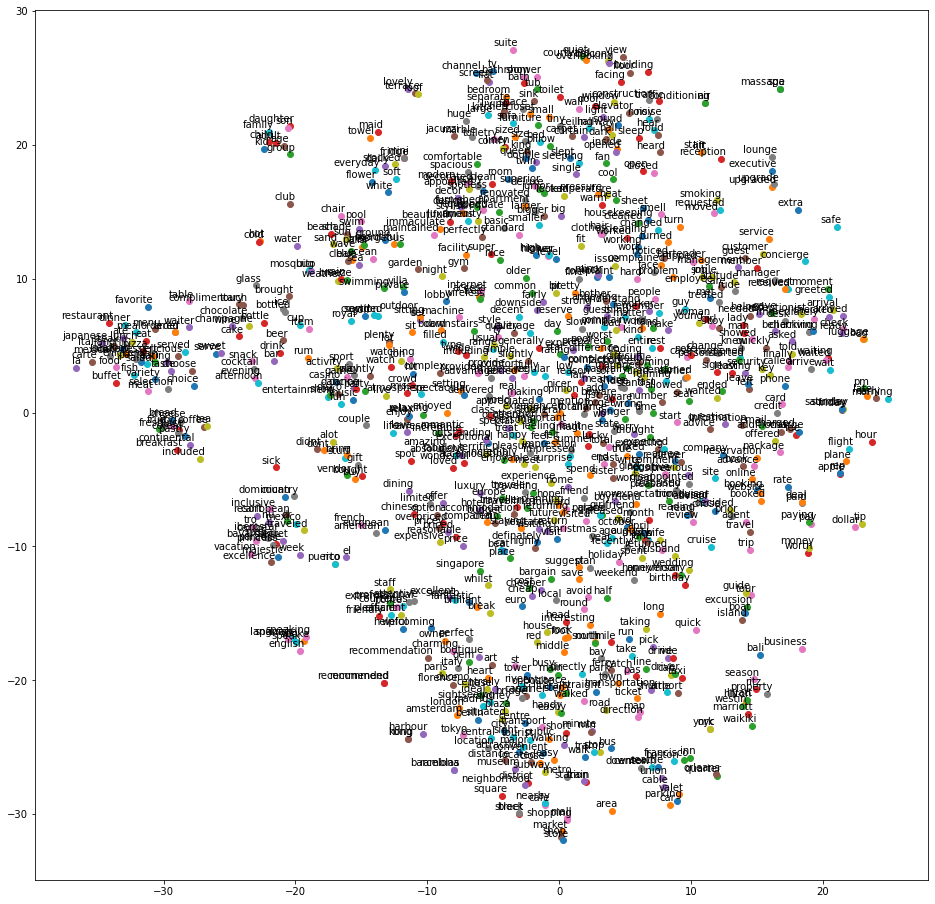

In [80]:
tsne_plot(model)